In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
data0 = pd.read_csv('./data/训练数据.csv')
data0

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [4]:
data0 = data0.iloc[1949:][['date']]
data0

,date
1949,2022-08-10
1950,2022-08-11
1951,2022-08-12
1952,2022-08-15
1953,2022-08-16
...,...
2430,2024-08-05
2431,2024-08-06
2432,2024-08-07
2433,2024-08-08


In [5]:
data0.reset_index(drop = True,inplace = True)
data0

,date
0,2022-08-10
1,2022-08-11
2,2022-08-12
3,2022-08-15
4,2022-08-16
...,...
481,2024-08-05
482,2024-08-06
483,2024-08-07
484,2024-08-08


In [6]:
data = pd.read_csv('./data/LSTM+修正论坛情绪值-预测值.csv')

In [7]:
data

,truth,pred,pred.1,pred.2,pred.3,pred.4
0,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047
1,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671
2,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695
3,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737
4,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124
...,...,...,...,...,...,...
481,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438
482,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578
483,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064
484,6.320948,6.306051,6.311377,6.306832,6.307106,6.304755


In [8]:
data = pd.concat([data0, data], axis=1)
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047
1,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671
2,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695
3,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737
4,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438
482,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578
483,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064
484,2024-08-08,6.320948,6.306051,6.311377,6.306832,6.307106,6.304755


In [9]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [10]:
data.index = data.date
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
date,,,,,,,
2022-08-10,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047
2022-08-11,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671
2022-08-12,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695
2022-08-15,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737
2022-08-16,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124
...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438
2024-08-06,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578
2024-08-07,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064


In [11]:
data.rename(columns={'pred': 'pred0'}, inplace=True)
data

,date,truth,pred0,pred.1,pred.2,pred.3,pred.4
date,,,,,,,
2022-08-10,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047
2022-08-11,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671
2022-08-12,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695
2022-08-15,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737
2022-08-16,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124
...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438
2024-08-06,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578
2024-08-07,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064


In [12]:
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])

In [13]:
data

,date,truth,pred0,pred.1,pred.2,pred.3,pred.4
date,,,,,,,
2022-08-10,2022-08-10,391.18,388.046819,391.056871,389.095844,388.953967,388.016048
2022-08-11,2022-08-11,389.56,389.640687,391.864062,389.791118,390.592181,389.035656
2022-08-12,2022-08-12,391.22,386.789455,390.856310,387.872858,388.118731,387.879607
2022-08-15,2022-08-15,392.00,389.516139,391.131844,389.828267,389.173399,387.895821
2022-08-16,2022-08-16,391.52,393.848178,394.824633,394.075691,392.254161,393.517052
...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,559.94,552.436613,556.470968,553.922453,553.800769,551.939479
2024-08-06,2024-08-06,554.18,551.599920,555.124826,552.487440,552.487606,550.913605
2024-08-07,2024-08-07,556.06,549.742507,552.774421,550.185503,550.303311,548.981092


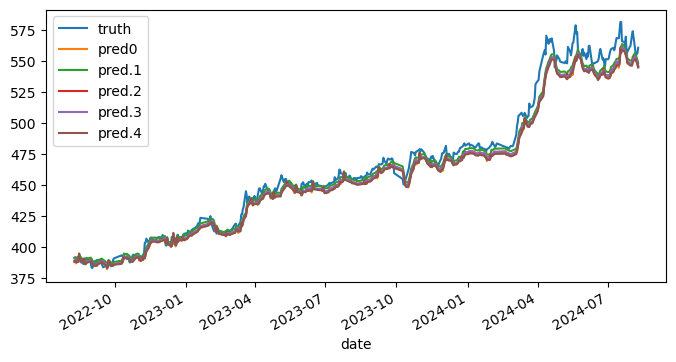

In [14]:
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [15]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

75.72279509232726 8.655057911630763 6.459031809849364 0.01312739384010685 0.9746162624099679


In [16]:
data = pd.read_csv('./data/LSTM+论坛情绪值-预测值.csv')

In [17]:
data = pd.concat([data0, data], axis=1)
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.953491,5.947422,5.956945,5.966329,5.952750
1,2022-08-11,5.965018,5.958741,5.951240,5.964411,5.969277,5.955420
2,2022-08-12,5.969270,5.970298,5.959844,5.978804,5.976882,5.963337
3,2022-08-15,5.971262,5.955863,5.950123,5.962621,5.962276,5.958784
4,2022-08-16,5.970037,5.957440,5.951698,5.964216,5.963867,5.960376
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.312674,6.299281,6.318428,6.326071,6.310591
482,2024-08-06,6.317490,6.292302,6.284871,6.301231,6.308273,6.292785
483,2024-08-07,6.320876,6.315863,6.304470,6.327183,6.324035,6.312338
484,2024-08-08,6.320948,6.302214,6.290409,6.308789,6.312311,6.302486


In [18]:
data.rename(columns={'pred': 'pred0'}, inplace=True)
data

,date,truth,pred0,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.953491,5.947422,5.956945,5.966329,5.952750
1,2022-08-11,5.965018,5.958741,5.951240,5.964411,5.969277,5.955420
2,2022-08-12,5.969270,5.970298,5.959844,5.978804,5.976882,5.963337
3,2022-08-15,5.971262,5.955863,5.950123,5.962621,5.962276,5.958784
4,2022-08-16,5.970037,5.957440,5.951698,5.964216,5.963867,5.960376
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.312674,6.299281,6.318428,6.326071,6.310591
482,2024-08-06,6.317490,6.292302,6.284871,6.301231,6.308273,6.292785
483,2024-08-07,6.320876,6.315863,6.304470,6.327183,6.324035,6.312338
484,2024-08-08,6.320948,6.302214,6.290409,6.308789,6.312311,6.302486


In [19]:
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])

In [20]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
data

,date,truth,pred0,pred.1,pred.2,pred.3,pred.4
date,,,,,,,
2022-08-10,2022-08-10,391.18,385.095363,382.765144,386.427937,390.070932,384.809998
2022-08-11,2022-08-11,389.56,387.122314,384.229335,389.323649,391.222714,385.839122
2022-08-12,2022-08-12,391.22,391.622357,387.549662,394.967546,394.209108,388.905740
2022-08-15,2022-08-15,392.00,386.009894,383.800544,388.627266,388.493330,387.138922
2022-08-16,2022-08-16,391.52,386.619266,384.405621,389.247738,389.111798,387.756009
...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,559.94,551.517517,544.180504,554.700318,558.956303,550.369956
2024-08-06,2024-08-06,554.18,540.395890,536.394877,545.242909,549.096006,540.656802
2024-08-07,2024-08-07,556.06,553.279335,547.011595,559.578152,557.819258,551.332458


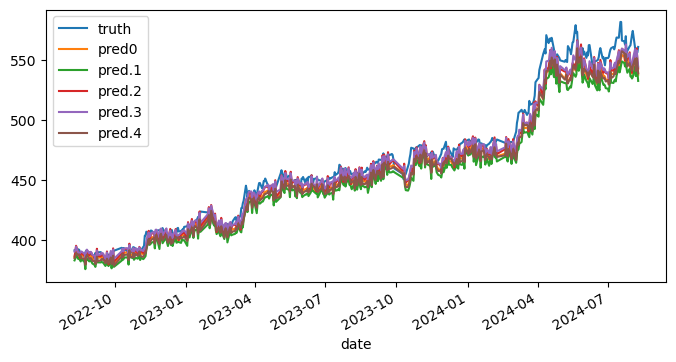

In [21]:
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [22]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

139.5675669413898 11.536371552043667 9.280310174448704 0.01915194177683352 0.9532142667079327


In [23]:
data = pd.read_csv('./data/LSTM-无外生变量预测值.csv')

In [24]:
data = pd.concat([data0, data], axis=1)
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.951310,5.960331,5.956617,5.949403,5.960240
1,2022-08-11,5.965018,5.953097,5.962174,5.958436,5.951181,5.962055
2,2022-08-12,5.969270,5.953078,5.962178,5.958547,5.951192,5.962086
3,2022-08-15,5.971262,5.953745,5.962859,5.959132,5.951834,5.962725
4,2022-08-16,5.970037,5.955305,5.964460,5.960705,5.953382,5.964302
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.299319,6.295363,6.301485,6.296156,6.313162
482,2024-08-06,6.317490,6.295620,6.292262,6.298446,6.292596,6.309658
483,2024-08-07,6.320876,6.290555,6.287846,6.293987,6.287619,6.304643
484,2024-08-08,6.320948,6.287128,6.284655,6.290663,6.284174,6.301118


In [25]:
data.rename(columns={'pred': 'pred0'}, inplace=True)
data

,date,truth,pred0,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.951310,5.960331,5.956617,5.949403,5.960240
1,2022-08-11,5.965018,5.953097,5.962174,5.958436,5.951181,5.962055
2,2022-08-12,5.969270,5.953078,5.962178,5.958547,5.951192,5.962086
3,2022-08-15,5.971262,5.953745,5.962859,5.959132,5.951834,5.962725
4,2022-08-16,5.970037,5.955305,5.964460,5.960705,5.953382,5.964302
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.299319,6.295363,6.301485,6.296156,6.313162
482,2024-08-06,6.317490,6.295620,6.292262,6.298446,6.292596,6.309658
483,2024-08-07,6.320876,6.290555,6.287846,6.293987,6.287619,6.304643
484,2024-08-08,6.320948,6.287128,6.284655,6.290663,6.284174,6.301118


In [26]:
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])

In [27]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
data

,date,truth,pred0,pred.1,pred.2,pred.3,pred.4
date,,,,,,,
2022-08-10,2022-08-10,391.18,384.256270,387.738251,386.301209,383.524422,387.703317
2022-08-11,2022-08-11,389.56,384.943665,388.453705,387.004182,384.206819,388.407366
2022-08-12,2022-08-12,391.22,384.936467,388.455181,387.047181,384.211199,388.419406
2022-08-15,2022-08-15,392.00,385.193190,388.719771,387.273825,384.457673,388.667686
2022-08-16,2022-08-16,391.52,385.794560,389.342882,387.883486,385.053390,389.281215
...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,559.94,544.201346,542.052305,545.380982,542.482811,551.787109
2024-08-06,2024-08-06,554.18,542.191901,540.374058,543.726303,540.554952,549.856646
2024-08-07,2024-08-07,556.06,539.452912,537.993243,541.307387,537.871132,547.106236


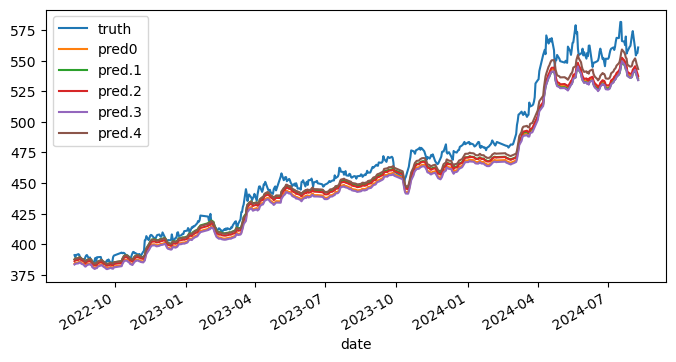

In [28]:
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [29]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

191.1087549525438 13.67798252290487 11.381506211167657 0.023319030342789433 0.9359366689917039


In [30]:
data = pd.read_csv('./data/DTR+修正论坛情绪值-预测值.csv')

In [31]:
data = pd.concat([data0, data], axis=1)
data

,date,truth,pred
0,2022-08-10,5.969168,5.962808
1,2022-08-11,5.965018,5.970394
2,2022-08-12,5.969270,5.974827
3,2022-08-15,5.971262,5.977315
4,2022-08-16,5.970037,5.965685
...,...,...,...
481,2024-08-05,6.327830,6.079796
482,2024-08-06,6.317490,6.079796
483,2024-08-07,6.320876,6.079796
484,2024-08-08,6.320948,6.079796


In [32]:
data['truth'] = np.exp(data['truth'])
data['pred'] = np.exp(data['pred'])

In [33]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
data

,date,truth,pred
date,,,
2022-08-10,2022-08-10,391.18,388.70
2022-08-11,2022-08-11,389.56,391.66
2022-08-12,2022-08-12,391.22,393.40
2022-08-15,2022-08-15,392.00,394.38
2022-08-16,2022-08-16,391.52,389.82
...,...,...,...
2024-08-05,2024-08-05,559.94,436.94
2024-08-06,2024-08-06,554.18,436.94
2024-08-07,2024-08-07,556.06,436.94


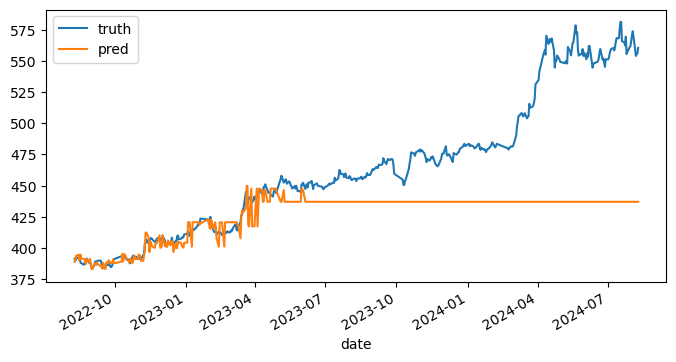

In [34]:
df = data[['truth','pred']]
ax = df.plot(figsize = (8,4))
plt.show()

In [35]:
MSE = metrics.mean_squared_error(data['truth'], data['pred'])
RMSE = np.sqrt(metrics.mean_squared_error(data['truth'], data['pred']))
MAE = metrics.mean_absolute_error(data['truth'], data['pred'])
MAE = metrics.mean_absolute_error(data['truth'], data['pred'])
MAPE = metrics.mean_absolute_percentage_error(data['truth'], data['pred'])
R2 = metrics.r2_score(data['truth'], data['pred'])
print(MSE,RMSE,MAE,MAPE,R2)

3334.3384362139896 57.743730709177335 38.77374485596707 0.07497708761355648 -0.11773438629697841


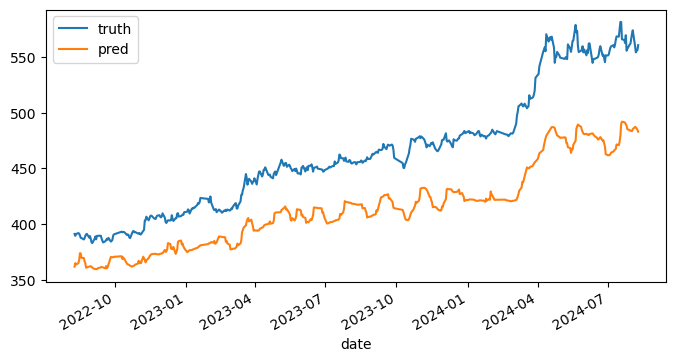

In [36]:
data = pd.read_csv('./data/SVR+修正论坛情绪值-预测值.csv')
data = pd.concat([data0, data], axis=1)
data['truth'] = np.exp(data['truth'])
data['pred'] = np.exp(data['pred'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred']]
ax = df.plot(figsize = (8,4))
plt.show()

In [37]:
MSE = metrics.mean_squared_error(data['truth'], data['pred'])
RMSE = np.sqrt(metrics.mean_squared_error(data['truth'], data['pred']))
MAE = metrics.mean_absolute_error(data['truth'], data['pred'])
MAE = metrics.mean_absolute_error(data['truth'], data['pred'])
MAPE = metrics.mean_absolute_percentage_error(data['truth'], data['pred'])
R2 = metrics.r2_score(data['truth'], data['pred'])
print(MSE,RMSE,MAE,MAPE,R2)

2793.9692839335303 52.858010593792976 49.14967328287924 0.10281982469854169 0.0634077485979494


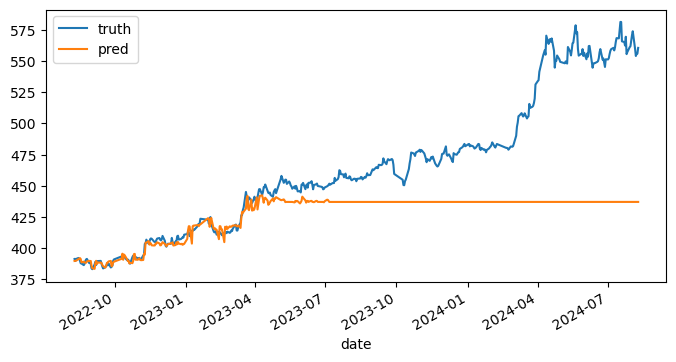

In [38]:
data = pd.read_csv('./data/RFR+修正论坛情绪值-预测值.csv')
data = pd.concat([data0, data], axis=1)
data['truth'] = np.exp(data['truth'])
data['pred'] = np.exp(data['pred'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred']]
ax = df.plot(figsize = (8,4))
plt.show()

In [39]:
MSE = metrics.mean_squared_error(data['truth'], data['pred'])
RMSE = np.sqrt(metrics.mean_squared_error(data['truth'], data['pred']))
MAE = metrics.mean_absolute_error(data['truth'], data['pred'])
MAE = metrics.mean_absolute_error(data['truth'], data['pred'])
MAPE = metrics.mean_absolute_percentage_error(data['truth'], data['pred'])
R2 = metrics.r2_score(data['truth'], data['pred'])
print(MSE,RMSE,MAE,MAPE,R2)

3318.9097768336287 57.60997983712222 38.16556767524355 0.07352482548758614 -0.11256240287244235


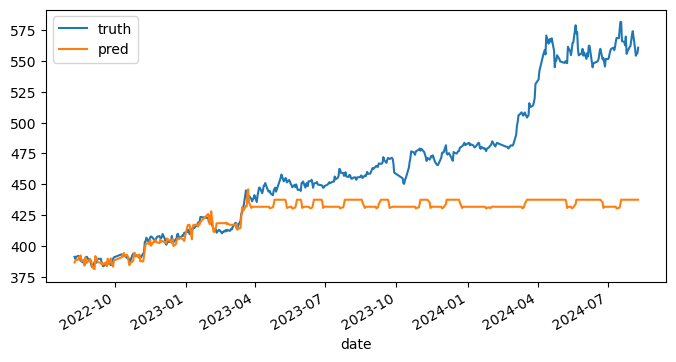

In [40]:
data = pd.read_csv('./data/XGBoost+修正论坛情绪值-预测值.csv')
data = pd.concat([data0, data], axis=1)
data['truth'] = np.exp(data['truth'])
data['pred'] = np.exp(data['pred'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred']]
ax = df.plot(figsize = (8,4))
plt.show()

In [41]:
MSE = metrics.mean_squared_error(data['truth'], data['pred'])
RMSE = np.sqrt(metrics.mean_squared_error(data['truth'], data['pred']))
MAE = metrics.mean_absolute_error(data['truth'], data['pred'])
MAE = metrics.mean_absolute_error(data['truth'], data['pred'])
MAPE = metrics.mean_absolute_percentage_error(data['truth'], data['pred'])
R2 = metrics.r2_score(data['truth'], data['pred'])
print(MSE,RMSE,MAE,MAPE,R2)

3490.9130501377654 59.083949175201255 40.35831938436529 0.07820896211100456 -0.17022120890113301


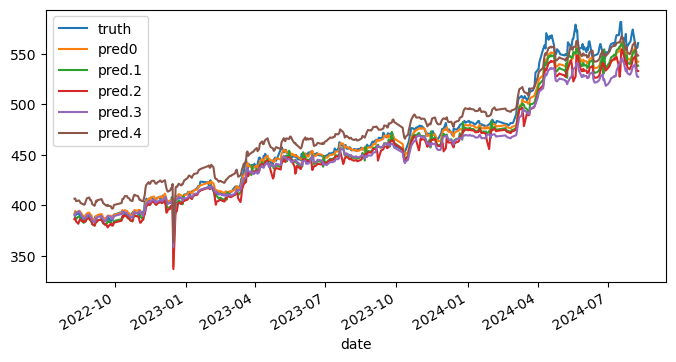

In [42]:
data = pd.read_csv('./data/RNN+修正论坛情绪值-预测值.csv')
data = pd.concat([data0, data], axis=1)
data.rename(columns={'pred': 'pred0'}, inplace=True)
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [43]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

150.33840515339733 11.977019582913877 9.514365294676507 0.019797789751902453 0.9496036745412683


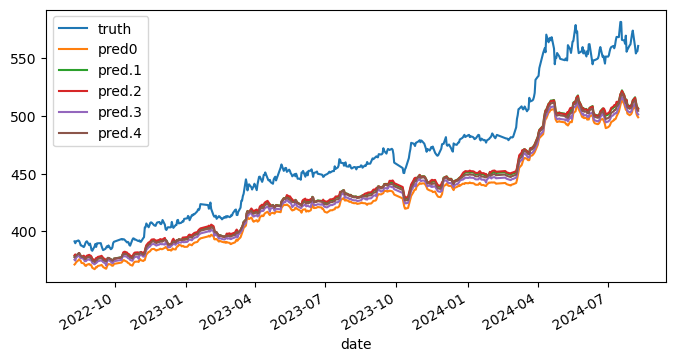

In [44]:
data = pd.read_csv('./data/GRU+修正论坛情绪值-预测值.csv')
data = pd.concat([data0, data], axis=1)
data.rename(columns={'pred': 'pred0'}, inplace=True)
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [45]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

1145.4477258771956 33.732015496986875 30.684080329290026 0.06368115140415384 0.6160238873734862


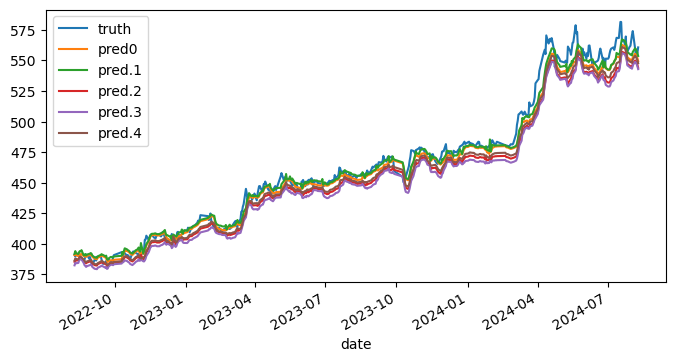

In [46]:
data = pd.read_csv('./data/BiLSTM+修正论坛情绪值-预测值.csv')
data = pd.concat([data0, data], axis=1)
data.rename(columns={'pred': 'pred0'}, inplace=True)
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [47]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

101.27322160194794 9.697655270970092 7.679041644311487 0.015865600853533147 0.9660512679318476


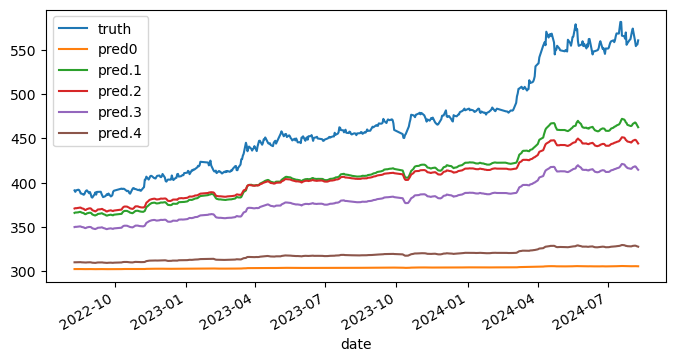

In [48]:
data = pd.read_csv('./data/LSTM+传统因素-预测值.csv')
data = pd.concat([data0, data], axis=1)
data.rename(columns={'pred': 'pred0'}, inplace=True)
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [49]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

13652.65283993389 107.67471541685197 100.4106412889377 0.20989066349071236 -3.576631867248719


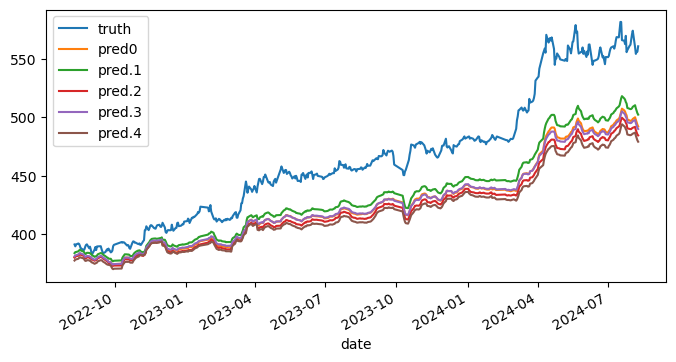

In [50]:
data = pd.read_csv('./data/LSTM+传统因素-高相关-预测值.csv')
data = pd.concat([data0, data], axis=1)
data.rename(columns={'pred': 'pred0'}, inplace=True)
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [51]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

1937.8113365756315 43.75017433694844 39.001886219955125 0.08037343310082869 0.3504083624138491


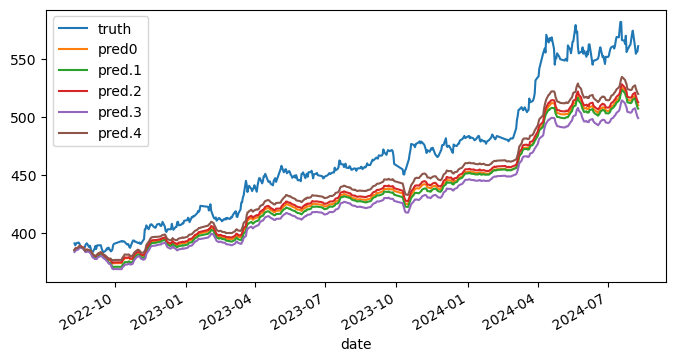

In [52]:
data = pd.read_csv('./data/LSTM+传统因素-高高相关-预测值.csv')
data = pd.concat([data0, data], axis=1)
data.rename(columns={'pred': 'pred0'}, inplace=True)
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [53]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

1004.0178553340389 31.344155515011 28.354290848636914 0.05880912635417623 0.6634339006578939


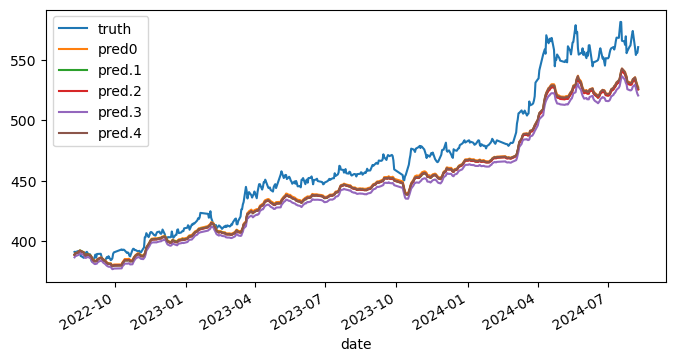

In [54]:
data = pd.read_csv('./data/LSTM+传统因素-高高高相关-预测值.csv')
data = pd.concat([data0, data], axis=1)
data.rename(columns={'pred': 'pred0'}, inplace=True)
data['truth'] = np.exp(data['truth'])
data['pred0'] = np.exp(data['pred0'])
data['pred.1'] = np.exp(data['pred.1'])
data['pred.2'] = np.exp(data['pred.2'])
data['pred.3'] = np.exp(data['pred.3'])
data['pred.4'] = np.exp(data['pred.4'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.index = data.date
df = data[['truth','pred0','pred.1','pred.2','pred.3','pred.4']]
ax = df.plot(figsize = (8,4))
plt.show()

In [55]:
MSE = (metrics.mean_squared_error(data['truth'], data['pred0']) + metrics.mean_squared_error(data['truth'], data['pred.1'])+ metrics.mean_squared_error(data['truth'], data['pred.2'])+ metrics.mean_squared_error(data['truth'], data['pred.3'])+ metrics.mean_squared_error(data['truth'], data['pred.4']))/5
RMSE = (np.sqrt(metrics.mean_squared_error(data['truth'], data['pred0'])) + np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.1']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.2']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.3']))+ np.sqrt(metrics.mean_squared_error(data['truth'], data['pred.4'])))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAE = (metrics.mean_absolute_error(data['truth'], data['pred0']) + metrics.mean_absolute_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_error(data['truth'], data['pred.4']))/5
MAPE = (metrics.mean_absolute_percentage_error(data['truth'], data['pred0']) + metrics.mean_absolute_percentage_error(data['truth'], data['pred.1'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.2'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.3'])+ metrics.mean_absolute_percentage_error(data['truth'], data['pred.4']))/5
R2 = (metrics.r2_score(data['truth'], data['pred0'])+metrics.r2_score(data['truth'], data['pred.1'])+metrics.r2_score(data['truth'], data['pred.2'])+metrics.r2_score(data['truth'], data['pred.3'])+metrics.r2_score(data['truth'], data['pred.4']))/5
print(MSE,RMSE,MAE,MAPE,R2)

386.697699437161 19.60473188939458 16.630865588603506 0.034008381411933984 0.8703714922671066


In [56]:
data = pd.read_csv('./data/处理后数据1.csv')
data

,date,黄金期货价格
0,2014-08-01,256.60
1,2014-08-04,258.90
2,2014-08-05,258.10
3,2014-08-06,257.90
4,2014-08-07,260.50
...,...,...
2452,2024-08-27,575.94
2453,2024-08-28,575.16
2454,2024-08-29,575.06
2455,2024-08-30,574.06


In [57]:
data.iloc[6:2441]

,date,黄金期货价格
6,2014-08-11,260.55
7,2014-08-12,261.00
8,2014-08-13,261.05
9,2014-08-14,261.65
10,2014-08-15,261.40
...,...,...
2436,2024-08-05,559.94
2437,2024-08-06,554.18
2438,2024-08-07,556.06
2439,2024-08-08,556.10


In [58]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

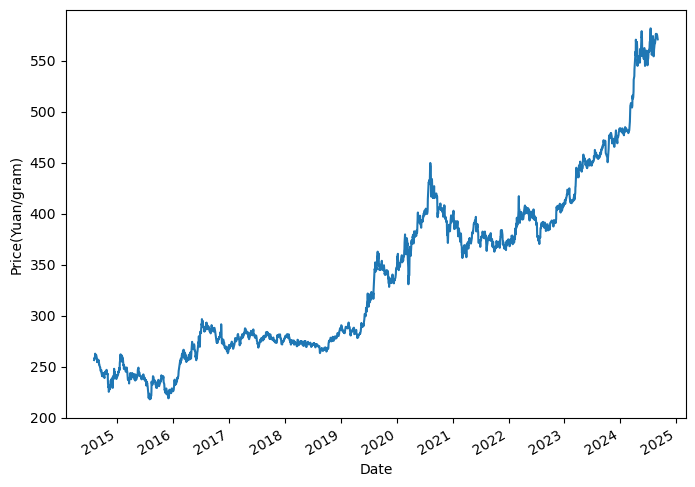

In [61]:
import matplotlib.dates as mdates
data.index = data.date
df = data['黄金期货价格']
ax = df.plot(figsize = (8,6))
ax.set_ylabel('Price(Yuan/gram)')
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.show()